In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series
import sys

In [4]:
sys.path.append("../")

In [8]:
BASE_DATA_DIR = "../data/"

In [5]:
from prime_derivative.util.date import get_period, parse_cpi_index_period
from prime_derivative.util.viz import line_plot, histogram

In [46]:
# Import data
CPI_INDEX_DATA = f"{BASE_DATA_DIR}/bls/bls_cpi.txt"
cpi_index = pd.read_csv(CPI_INDEX_DATA, delim_whitespace=True)

/var/folders/3n/7kvkbqjd0l9grdj7kptkcfgr0000gn/T/ipykernel_67912/3397718006.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cpi_index = pd.read_csv(CPI_INDEX_DATA, delim_whitespace=True)


In [10]:
# Clean up values for various items in the CPI
cpi_index['value'] = cpi_index['value'].replace(['-'], 0.00)
cpi_index = cpi_index.astype({'value': 'float64'})

In [11]:
cpi_index['period'] = cpi_index.apply(lambda row: get_period(row), axis=1)

In [12]:
cpi_index = cpi_index.set_index('period')

In [47]:
FEDERAL_FUNDS_DATA = f"{BASE_DATA_DIR}/fed/federal_funds_effective_rate.csv"
federal_funds_rates = pd.read_csv(FEDERAL_FUNDS_DATA)

In [50]:
cpi_index

,series_id,year,period,value,footnote_codes
0,APU0000701111,1995,M01,0.238,NaN
1,APU0000701111,1995,M02,0.242,NaN
2,APU0000701111,1995,M03,0.242,NaN
3,APU0000701111,1995,M04,0.236,NaN
4,APU0000701111,1995,M05,0.244,NaN
5,APU0000701111,1995,M06,0.244,NaN
6,APU0000701111,1995,M07,0.248,NaN
7,APU0000701111,1995,M08,0.255,NaN
8,APU0000701111,1995,M09,0.256,NaN
9,APU0000701111,1995,M10,0.254,NaN


In [16]:
federal_funds_rates = federal_funds_rates.astype({
    'federal_funds_effective_rate': 'float64',
    'time_period': 'datetime64[ns]'  # Use 'datetime64[ns]' instead of 'datetime64'
}).rename(columns={'time_period': 'period'}).set_index('period')


In [17]:
federal_funds_rates = federal_funds_rates.resample('M').mean()

/var/folders/3n/7kvkbqjd0l9grdj7kptkcfgr0000gn/T/ipykernel_67912/1408212448.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  federal_funds_rates = federal_funds_rates.resample('M').mean()


In [18]:
federal_funds_rates.index = federal_funds_rates.index.to_period('M')

In [19]:
cpi_index.head()

,series_id,year,value,footnote_codes
period,,,,
1995-01,APU0000701111,1995,0.238,NaN
1995-02,APU0000701111,1995,0.242,NaN
1995-03,APU0000701111,1995,0.242,NaN
1995-04,APU0000701111,1995,0.236,NaN
1995-05,APU0000701111,1995,0.244,NaN


In [20]:
federal_funds_rates.head()

,federal_funds_effective_rate
period,
1954-07,1.076


In [22]:
cpi_index = cpi_index.groupby("period").mean(numeric_only=True)

In [23]:
federal_funds_rates_array = federal_funds_rates.loc[federal_funds_rates.index >= '2000'].index.to_numpy()

In [24]:
cpi_index_array = cpi_index.loc[cpi_index.index >= '2000'].index.to_numpy()

In [25]:
federal_funds_rates_after_2000 = federal_funds_rates.loc[federal_funds_rates.index >= '2000']

In [26]:
cpi_index_after_2000 = cpi_index.loc[cpi_index.index >= '2000']

In [27]:
federal_funds_rates_array_after_2000 = federal_funds_rates_after_2000["federal_funds_effective_rate"].to_numpy()

In [28]:
cpi_index_array_after_2000 = cpi_index_after_2000["value"].to_numpy()

In [29]:
series = zip(cpi_index_array_after_2000, federal_funds_rates_array_after_2000)

In [38]:
series.head()

AttributeError: 'zip' object has no attribute 'head'

In [30]:
x = np.array([])
y = np.array([])

for x_value, y_value in series:
    x = np.append(x, x_value)
    y = np.append(y, y_value)


In [43]:
cpi_index

,year,value,footnote_codes
period,,,
1995-01,1995.0,0.238,NaN
1995-02,1995.0,0.242,NaN
1995-03,1995.0,0.242,NaN
1995-04,1995.0,0.236,NaN
1995-05,1995.0,0.244,NaN
1995-06,1995.0,0.244,NaN
1995-07,1995.0,0.248,NaN
1995-08,1995.0,0.255,NaN
1995-09,1995.0,0.256,NaN


In [44]:
federal_funds_rates

,federal_funds_effective_rate
period,
1954-07,1.076


In [40]:
print(cpi_index.shape)  # Check if the DataFrame has rows
print(federal_funds_rates.shape)


(10, 3)
(1, 1)


In [45]:
print(cpi_index.index.min(), cpi_index.index.max())  # Check range of CPI index
print(federal_funds_rates.index.min(), federal_funds_rates.index.max())  # Check range of federal funds rate


1995-01 1995-10
1954-07 1954-07


In [39]:
print(len(x), len(y))

0 0


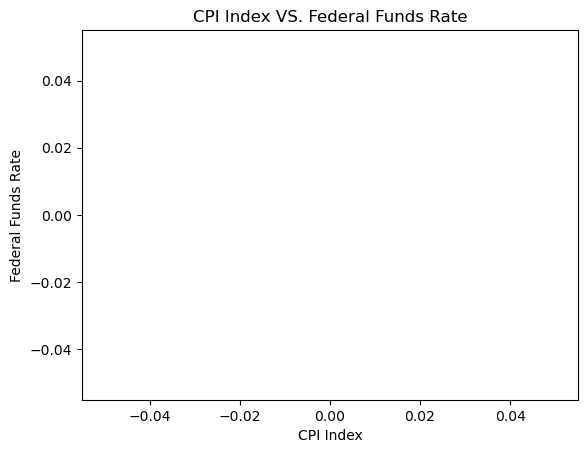

In [31]:
line_plot(x=x, 
          y=y, 
          x_label="CPI Index", 
          y_label="Federal Funds Rate",
          title="CPI Index VS. Federal Funds Rate")

<Axes: xlabel='CPI Index', ylabel='Federal Funds Rate'>

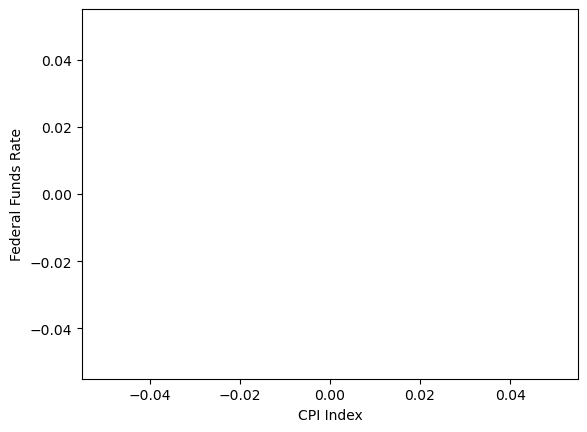

In [32]:
cpi_csv_ffr = pd.DataFrame({'CPI Index': x, 'Federal Funds Rate': x})
cpi_csv_ffr.plot('CPI Index', 'Federal Funds Rate', kind='scatter')

In [33]:
series = zip(federal_funds_rates_array_after_2000, cpi_index_array_after_2000)

In [34]:
x = np.array([])
y = np.array([])

for x_value, y_value in series:
    x = np.append(x, x_value)
    y = np.append(y, y_value)

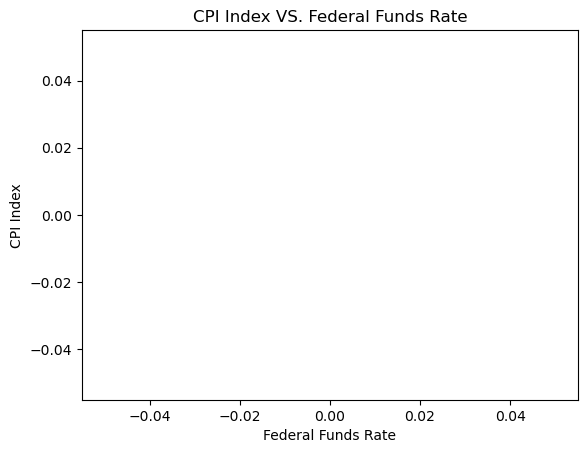

In [35]:
line_plot(x=x, 
          y=y, 
          x_label="Federal Funds Rate", 
          y_label="CPI Index",
          title="CPI Index VS. Federal Funds Rate")